# <center>Exploratory Data Analysis and Data Visualization</center>

##  1. What is Exploratory Data Analysis (EDA)

- EDA is an approach to analyzing data sets to 
  * prepare data for modeling, e.g. 
    - dealing with missing values
    - feature engineering
    - correlation analysis etc
  * summarize their main characteristics, often with visual methods (i.e. **data profiling**)
  * generate hypotheses for subsequent modeling stage 

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model_year      406 non-null int64
origin          406 non-null int64
car             406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


**Dealing with missing values**

In [24]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car             0
dtype: int64

In [25]:
df=df.dropna(axis=0, how='any')  

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car             392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 2. Visualization  
- Typical graphical techniques used in EDA:
  - Bar chart: discrete data counts
  - Histogram: continuous data counts
  - Line chart
  - Scatter plot
  - Heatmap
  - ...
  
- Plot libraries
  - Matplotlib: a Python 2D plotting library which produces publication quality figures  
  - Seaborn:  a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
  - Pandas plot: very convenient library based on matplotlib  
    Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1 Barchart

In [28]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

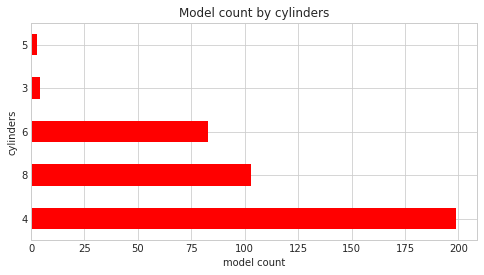

In [29]:
#Plot number of cars by cylinders
# note: ";" to suppress unwanted output

ax=df.cylinders.value_counts().plot.barh(figsize=(8,4), \
                                         title="Model count by cylinders",color='r');
# set labels
ax.set(ylabel="cylinders", xlabel="model count");
# set grid
ax.grid(True)
plt.show();

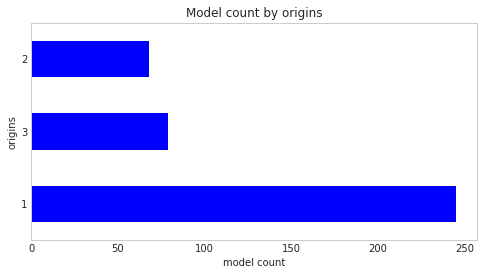

In [30]:
# create a bar chart to count models per origin
df.origin.value_counts().plot(kind='barh',figsize=(8,4), \
                              title="Model count by origins",color='blue',grid=False);
plt.ylabel("origins");
plt.xlabel("model count");
plt.show();

These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

In [31]:
# Use seaborn to generate attractive plot
# count cars by year
count_by_year=df.model_year.value_counts().reset_index()
count_by_year.columns=["year", "model_count"]
count_by_year

,year,model_count
0,73,40
1,78,36
2,76,34
3,82,30
4,75,30
5,79,29
6,70,29
7,81,28
8,77,28
9,72,28


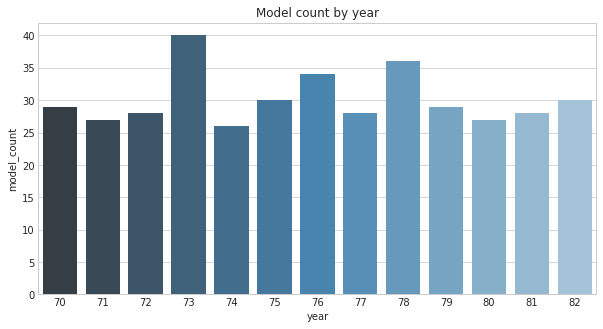

In [33]:
# set style
sns.set_style("whitegrid");
plt.figure(figsize=(10,5));
sns.barplot(x='year',y='model_count', data=count_by_year,palette="Blues_d");#palette="Blues_d"
plt.title("Model count by year");
plt.show();  

### 2.2 Histogram: learn distribution of varilables

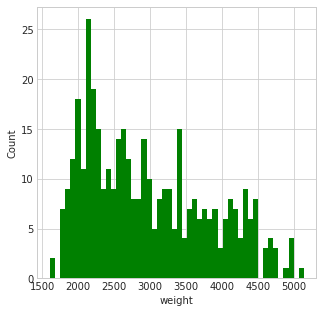

In [34]:
# plot histgram using matplotlib
plt.figure(figsize=(5, 5));
plt.hist(df['weight'], color='g', bins=50);
plt.xlabel("weight");
plt.ylabel("Count");
plt.show();

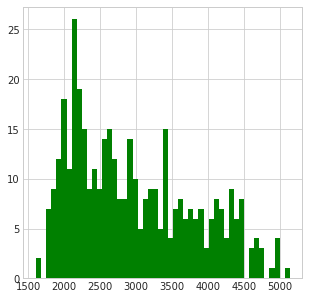

In [35]:
#plot histogram plots using pandas plot
df['weight'].hist(figsize=(5, 5), color='g',bins=50);
plt.show();

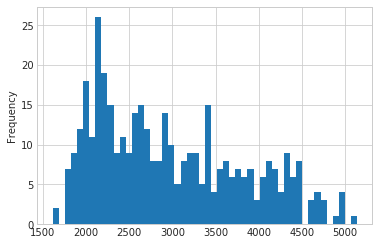

In [36]:
df['weight'].plot(kind='hist',bins =50);
plt.show();

### 2.3 line chart

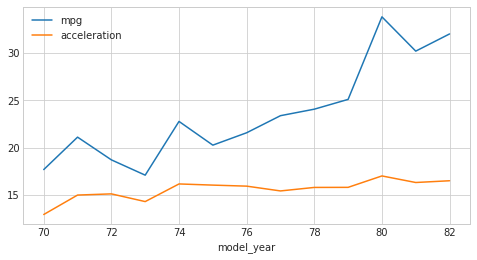

In [37]:
# line chart
# How does mpg/acceleration change over time?
# show the relationship between average mpg/acceleration and model year
df.groupby('model_year')["mpg","acceleration"].mean()\
.plot(kind='line', figsize=(8,4),legend=True);
plt.show();

### 2.4 Scatterplot: show interaction between variables
- Pairwise scatter plot: discover interaction between any pair of variables
- Check variable correlation using pd.corr()

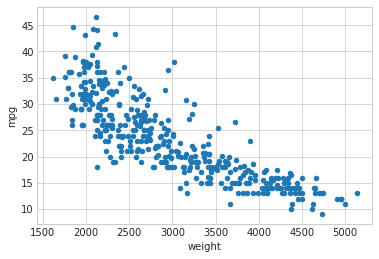

In [38]:
df.plot(kind='scatter',x='weight',y='mpg');
plt.show();

In [39]:
#Variable correlation
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 2.5 Heatmap

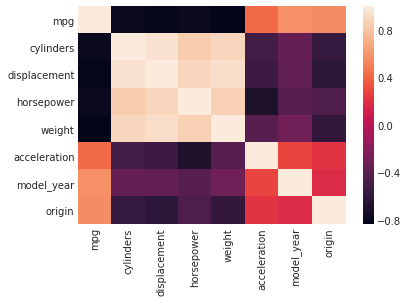

In [40]:
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values);